In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import operator

# Music Analysis
Our data has various features on music that can be valuable. A few issues come with the data we get, though.<br>
First we create column names and create the Dataframe for the data.

In [2]:
columns = ['Artist', 'Title', 'Album', '#_of_views', 'Release_date', '#_feat_artists', 'Artist_pop', 'Genre', 
           'Followers', 'Danceability', 'Energy', 'Valence', 'Duration', 'Loudness', '#_words', 'Lyrics']
data = pd.read_csv('lyricDataset.scv', names = columns)

Based on the greatest similarity between track titles, the data from Spotify was concatenated to the current Genius dataset. Now the dataset has additional features from Spotify. Some of the feature descriptions are grabbed straight from the Spotify API. The full list of features are as follow:<br>

1. 'Artist' - Song artist<br>
DESCRIPTION: Name of artist
2. 'Title' - Song title<br>
DESCRIPTION: Name of song
3. 'Album' - Album Title<br>
DESCRIPTION: Name of album the song is from.
4. '#_of_views' - Number of pageviews for the lyric<br>
DESCRIPTION: Amount of views the lyric page got on the Genius website.
5. 'Release_date' - Release date of song<br>
DESCRIPTION: The date the song was released
6. '#_feat_artists' - How many featured artists<br>
DESCRIPTION: The amount of artists featured on song
7. 'Artist_pop' - Artist Popularity<br>
DESCRIPTION: How popular an artist is on Spotify. Range is 0-100.
8. 'Genre' - Genre(s)<br>
DESCRIPTION: Genre the artist is considered as, separated by ' / '.
9. 'Followers'<br>
DESCRIPTION: The amount of users following an artist on Spotify
10. 'Danceability'<br>
DESCRIPTION: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. (Gotten from Spotify)
11. 'Energy'<br>
DESCRIPTION: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
12. 'Valence'<br>
DESCRIPTION: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
13. 'Duration' - Duration (in Milliseconds)<br>
DESCRIPTION: The length of the song in milliseconds
14. 'Loudness'<br>
DESCRIPTION: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
15. '#_words' - Total words in lyrics<br>
DESCRIPTION: How many words each lyric has.
16. 'Lyrics'<br>
DESCRIPTION: The lyrics for the specific song.

In [3]:
data.head(1)

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,contemporary country / country / country dawn ...,2184569,0.568,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...


## Cleaning

In [4]:
data.shape

(1580, 16)

In [5]:
data.isnull().sum()

Artist             0
Title              0
Album             21
#_of_views         0
Release_date      87
#_feat_artists     0
Artist_pop         0
Genre             20
Followers          0
Danceability       0
Energy             0
Valence            0
Duration           0
Loudness           0
#_words            0
Lyrics             1
dtype: int64

In [6]:
data[data['Genre'].isnull()]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
1160,Gavlyn,What I Do,From the Art,53005,2009-01-01,0,43,NaN,33583,0.494,0.858,0.335,190068,-3.965,401,Yeah\nOh - man it's like...\nIt's beautiful h...
1161,Gavlyn,Why Don’t You Do Right,From the Art,11409,2012-10-02,0,43,NaN,33583,0.649,0.810,0.284,175570,-7.885,341,Why don't you do right?\nLike some other men d...
1162,Gavlyn,Guilty Pleasure,Modest Confidence,8157,2013-10-14,0,43,NaN,33583,0.374,0.814,0.628,200830,-5.763,442,A culture shock to put it in words\nYou might...
1163,Gavlyn,We On,Headspace,6039,2017-01-20,0,43,NaN,33583,0.478,0.606,0.259,187774,-6.865,514,Ayo we on peace to those that say we not\nAyo...
1164,Gavlyn,All Too Well,Modest Confidence,0,2014-01-17,0,43,NaN,33583,0.577,0.807,0.349,196599,-4.776,411,Alright\nYeah yeah yeah\nQuick to say the ob...
1165,Gavlyn,Clarity/To the Feeling,From the Art,0,2012-10-02,0,43,NaN,33583,0.478,0.944,0.694,153836,-5.335,596,Clarity/To the Feeling\nYeah from the art\nGa...
1166,Gavlyn,Needs,Headspace,0,2017-08-08,0,43,NaN,33583,0.774,0.663,0.281,196805,-5.271,351,How can I focus on your whereabouts\nWhen I'm ...
1167,Gavlyn,Clarity,From the Art,0,2012-10-02,0,43,NaN,33583,0.713,0.677,0.786,192811,-5.252,474,Ugh yea\nFrom the art\nGavlyn\nAnd it's that ...
1168,Gavlyn,Looking Back,Headspace,0,2018-03-05,2,43,NaN,33583,0.521,0.738,0.534,279614,-5.135,802,Hey yo what's up Vel and Rev man\nIt's been a...
1169,Gavlyn,Staring Problem,From the Art,0,2012-10-02,0,43,NaN,33583,0.699,0.929,0.667,188945,-4.057,474,Damn man\nWhat the fuck are you looking at?\nY...


All missing Genre from the same artist Gavlyn. And he is known as a hip hop artist. So we can fill the missing values

In [7]:
data['Genre'].fillna('hip hop', inplace = True)

In [8]:
data[data['Lyrics'].isnull()]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
32,In Hearts Wake,Ark,Ark,0,2017-04-24,0,50,australian metalcore / melodic metalcore / met...,88252,0.339,0.415,0.204,70002,-16.547,0,NaN


The missing lyrics from the only one song and this song is instrumental, so we just drop it.

In [9]:
data.dropna(subset = ['Lyrics'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [10]:
data.shape

(1579, 16)

<br>
The genre column is a little confusing. Most songs have more than one genre, with some of the genres being sub-genres. For instance, instead of `contemporary country`, we can replace that with `country`. The same goes for `pop-punk`, `metalcore`, `indie pop`, etc. <br>
Instead, we will bin the genres so that there are no sub-genres allowed. The only genres we want are `country`, `hip hop`, `pop`, `rock` and `metal`.

In [11]:
genres = data['Genre']
g_list = list(genres)
genre_list = ['country', 'hip hop', 'pop', 'rock', 'punk', 'metal', 'australian'] #Australian reggae is outlier

In [12]:
correct_guesses = {}
for index, genre in enumerate(g_list):
    if type(genre) == float:
        continue
    else:
        if len(genre) == 1:
            print(genre)
            split_genres = genre
        else:
            split_genres = genre.split(' / ') 
    for g in genre_list:
        correct = 0
        if len(split_genres) == 1 and split_genres[0] == 'rap':
            correct_guesses['hip hop'] = correct
        else:
            for split in split_genres:
                if g in split:
                    correct += 1
            correct_guesses[g] = correct
    
    correct_genre = max(correct_guesses, key=lambda key: correct_guesses[key])
    if correct_genre == 'australian':
        g_list[index] = 'pop'
    elif correct_genre == 'punk':
        g_list[index] = 'rock'
    else:
        g_list[index] = correct_genre
    correct_guesses.clear()

### Genre problems
Some songs have strange genres, so we will convert those to `pop`. Some of the weird genres are `australian psychadelic` and `australian reggae`. The artists that have these genre tags are `Sticky Fingers` and `Tame Impala`. As far as I know, those artists are quite popular.<br>
Below the new `corrected_genres` column is added, so only one genre is listed.

In [13]:
data['Genre'] = g_list
data.head()

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,country,2184569,0.568,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,74,country,2184569,0.425,0.372,0.292,259280,-10.920,147,Hey there Mr. Tin Man\nYou don't know how luck...
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,74,country,2184569,0.584,0.813,0.774,204387,-7.221,255,You only love me for my big sunglasses\nAnd my...
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,74,country,2184569,0.768,0.809,0.748,177773,-4.204,315,I cut my bangs with some rusty kitchen scissor...
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,74,country,2184569,0.777,0.245,0.349,109107,-14.266,307,Stand on the bar stomp your feet start clapp...


## Sentiment Analysis
Another column we want to add for analysis is the perceived sentiment of each lyric. Before we calculate the analysis, we need to clean up the lyric column. So, we remove punctuation and make everything lowercase. 

In [14]:
data['Lyrics'] = data['Lyrics'].astype(str)
data['Lyrics'] = data['Lyrics'].str.lower()
data['Lyrics'] = data['Lyrics'].str.translate(string.punctuation)
data['Lyrics'] = data['Lyrics'].str.replace('+', ' ').replace('\\', '').replace('"', '')

The library that calculates sentiment is called `vaderSentiment`. The description from the vader github states: VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.<br>
Since this is based on sentiments expressed in social media, it may not be the best. The next step to take after this analysis is to look into training our own model on lyrics. For now, we will work with this sentiment analysis.

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = []
analyzer = SentimentIntensityAnalyzer()
for label, content in data['Lyrics'].items():
    sentiment.append(analyzer.polarity_scores(content))

### Sentiments
There are 4 values this analyzer returns. The values are<br>
1. The perceived negativaty of the lyrics.
2. The perceived neutrality of the lyrics.
3. The perceived positivity of the lyrics.
4. The compound score that decides how negative, neutral and positive a lyric is.
<br>
All the values range from `-1 to 1`.

In [16]:
neg = []
neu = []
pos = []
compound = []

In [17]:
for sentiments in sentiment:
    neg.append(sentiments['neg'])
    neu.append(sentiments['neu'])
    pos.append(sentiments['pos'])
    compound.append(sentiments['compound'])

In [18]:
data['negative_score'] = neg
data['neutral_score'] = neu
data['positive_score'] = pos
data['compound_score'] = compound

In [19]:
data.head()

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics,negative_score,neutral_score,positive_score,compound_score
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,country,2184569,0.568,0.562,0.247,240280,-7.775,233,sting of the needle dropping on a vinyl neon s...,0.034,0.868,0.098,0.9311
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,74,country,2184569,0.425,0.372,0.292,259280,-10.920,147,hey there mr. tin man you don't know how lucky...,0.124,0.781,0.094,-0.2295
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,74,country,2184569,0.584,0.813,0.774,204387,-7.221,255,you only love me for my big sunglasses and my ...,0.048,0.780,0.172,0.9901
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,74,country,2184569,0.768,0.809,0.748,177773,-4.204,315,i cut my bangs with some rusty kitchen scissor...,0.146,0.763,0.091,-0.9398
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,74,country,2184569,0.777,0.245,0.349,109107,-14.266,307,stand on the bar stomp your feet start clapp...,0.174,0.661,0.165,-0.9289


## Various Genre Summaries
Now that we've decreased the number of genres per song to just one genre, we can begin some analysis. First we group the dataframe by the corrected genres.<br>
We can see `pop` has the most songs in this dataset, with `rock` having the least.

In [20]:
data['Genre'].value_counts()

pop        500
hip hop    460
country    220
metal      219
rock       180
Name: Genre, dtype: int64

In [21]:
genre_analyze = data.groupby(['Genre'])

### Song Analytics
Below we will get averages of some features all songs have. Those features are:
1. How danceable a song is
2. How much energy a song has
3. The mood of a song
4. How loud a song is
5. How many words a song has
6. How long songs are

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bee6d1860>,
      dtype=object)

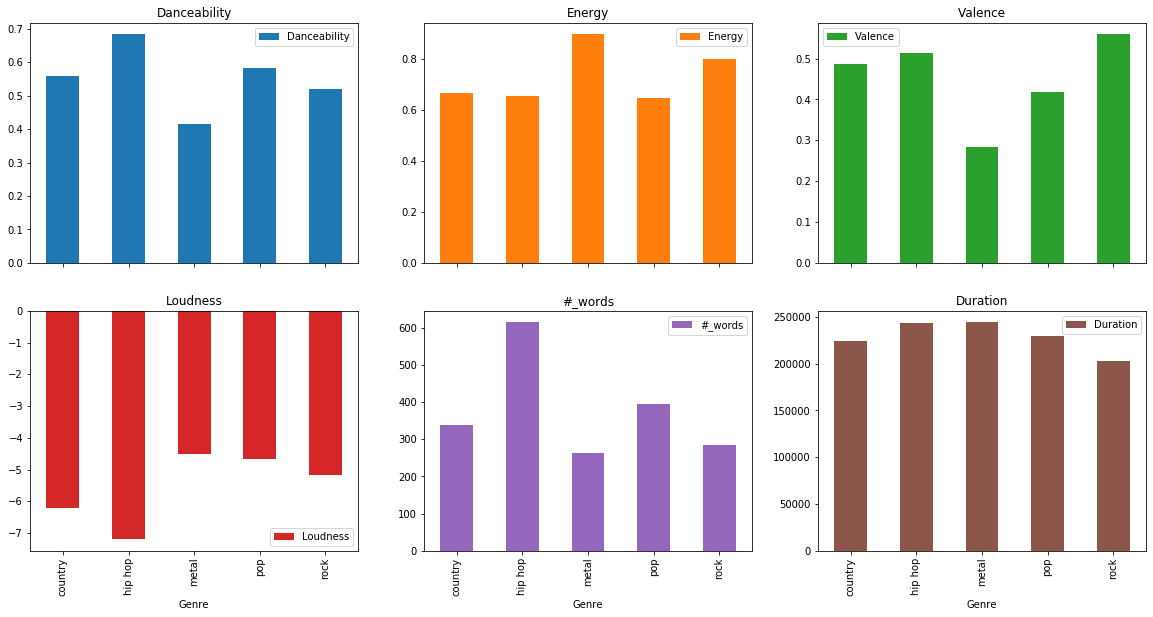

In [22]:
genre_analyze[['Danceability', 'Energy', 'Valence', 'Loudness', '#_words', 'Duration']].mean().plot.bar(subplots=True, layout=(3,3), figsize=(20,15))

We will go feature-by-feature for these charts, noting interesting statistics about each feature.
<br><br>
`Danceability`:
* As should be obvious, metal is the least danceable music amongst these genres.
* Hip-hop is the most danceable genre. I assume this is because of the bass and drums incorporated into many hip-hop songs
* Interestingly, country is almost as danceable as pop music. I can only imagine two stepping with country music
<br><br>
`Energy`:
* Metal has the most energy amongst these genres. Metal music usually has fast riffs and fast instrumentals.
* Rock would be the next highest energy.
* The last three seem to have around the same energy.
<br><br>
`Valence`:
* The most positive genre seems to be rock. I would assume pop would be more positive.
* The metal genre is the least positive, from the entire bunch. That makes sense, since metal music can be dark sometimes.
* Hip-hop is almost as positive as rock
* Something to note about this feature, is that the instrumentals are used to calculate valence as well.
<br><br>
`Loudness`:
* The higher the loudness, the more loud the music is.
* The most loud genre is metal. Next loudest is is pop.
* Hip-hop is the generally the least loud.
<br><br>
`Number of words`:
* Hip-hop has the highest average amount of words per song. Hip hop artists are usually lyricists.
* Even though hip hop artists have the highest word count, it could be repititions.
* The least wordy genre is metal. I assume this comes from metal being focused on instrumentals.
<br><br>
`Duration in milliseconds`:
* The duration is close to the same for each genre.
* Hip hop seems to have the highest duration.

## Sentiment Analytics
Now we will focus on the sentiments calculated by the vader library.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6beeea4a20>,
      dtype=object)

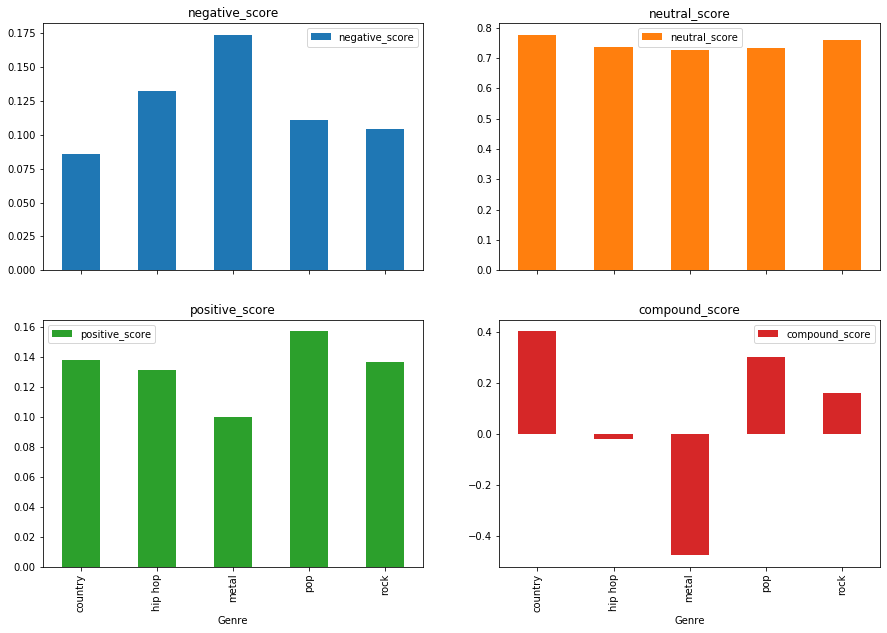

In [23]:
genre_analyze[['negative_score', 'neutral_score', 'positive_score', 'compound_score']].mean().plot.bar(subplots=True, layout=(2,2), figsize=(15,10))

The neutral scores don't have anything interesting going on, so we will ignore those. The compound scores are used to calculate positive, negative and neutral scores. So, compound scores may show similar results from negative and positive scores.<br>
For the negative scores, metal music seems to generally be more negative. Close behind metal is hip-hop.<br>
The most positive genre goes to pop. When I think of pop music, I imagine happy, catchy songs. So, this makes sense.

<br>
We will try to find correlation of 'Danceability', 'Energy', 'Valence' and 'Loudness'

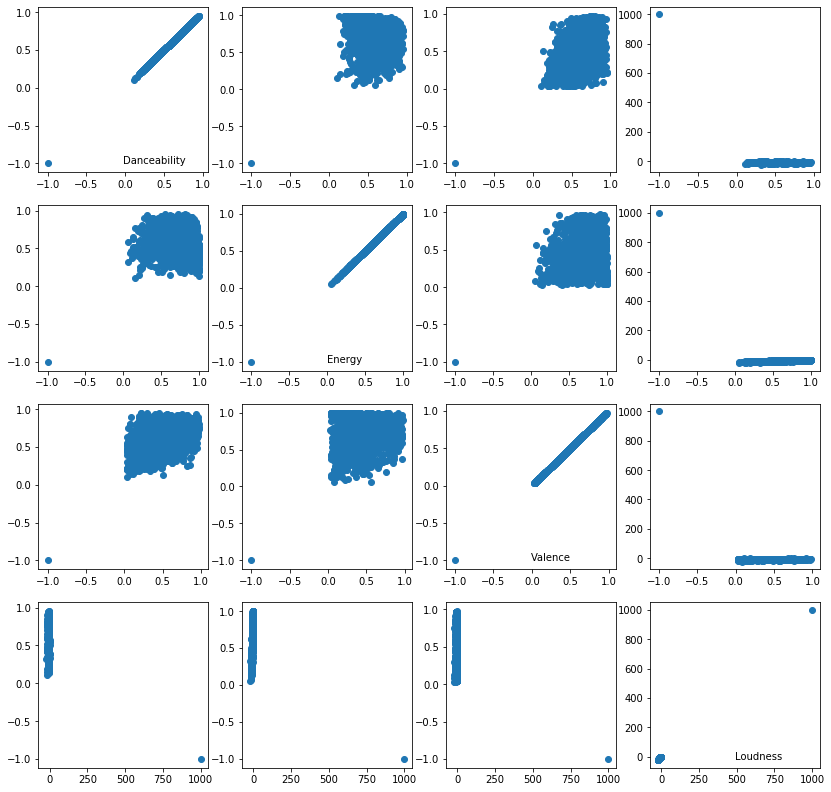

In [24]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness']
for i in range(16):
    plt.subplot(4, 4, i + 1)
    x = i // 4
    y = i % 4

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

All mentioned above features have outliers.<br>

In [25]:
data['Danceability'].describe()

count    1579.000000
mean        0.578511
std         0.173039
min        -1.000000
25%         0.464000
50%         0.575000
75%         0.701000
max         0.953000
Name: Danceability, dtype: float64

In [26]:
data[data['Danceability'] < 0]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics,negative_score,neutral_score,positive_score,compound_score
80,Tame Impala,Let It Happen,Currents,454385,2015-03-11,0,88,pop,3352582,-1.0,-1.0,-1.0,0,999.0,265,it's always around me all this noise but not ...,0.029,0.829,0.142,0.9853


Seems like this is the line which has all corrupted data. We will drop it

In [27]:
data.drop(80, inplace = True)
data.reset_index(drop = True, inplace = True)

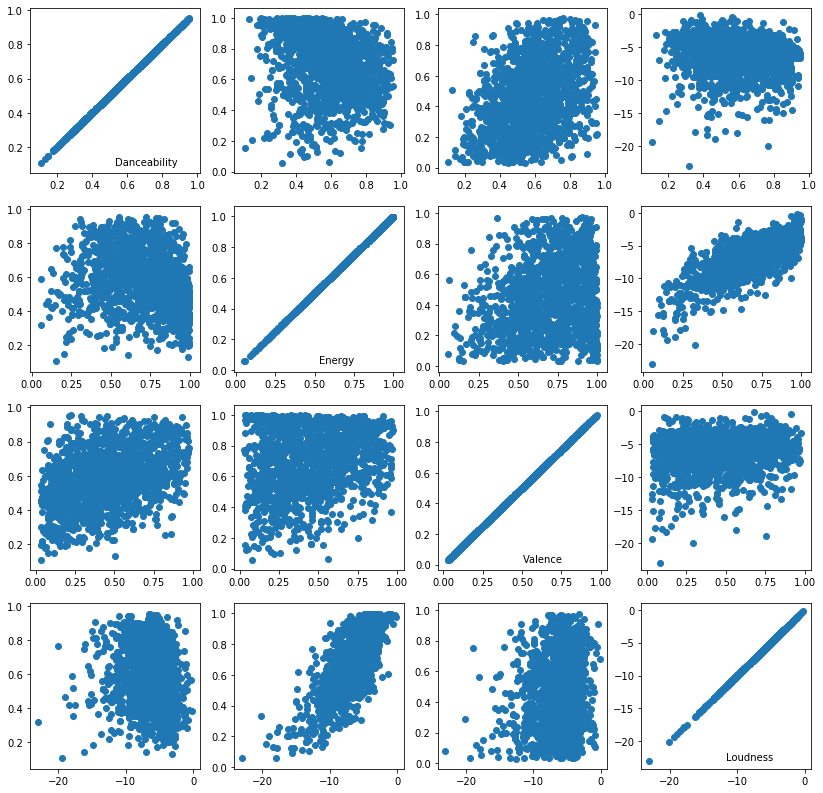

In [28]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness']
for i in range(16):
    plt.subplot(4, 4, i + 1)
    x = i // 4
    y = i % 4

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

We have good correlation between 'Energy' and 'Loudness'<br>

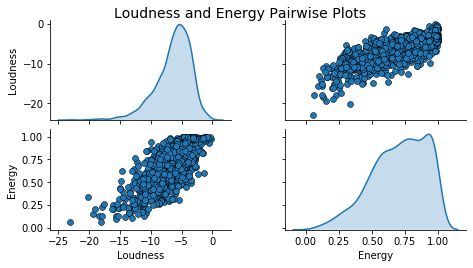

In [29]:

# Pair-wise Scatter Plots
cols = ['Loudness', 'Energy']
pp = sns.pairplot(data[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Loudness and Energy Pairwise Plots', fontsize=14)

<br>
Now we will add final sentimental analysis results which is in 'compound_score'

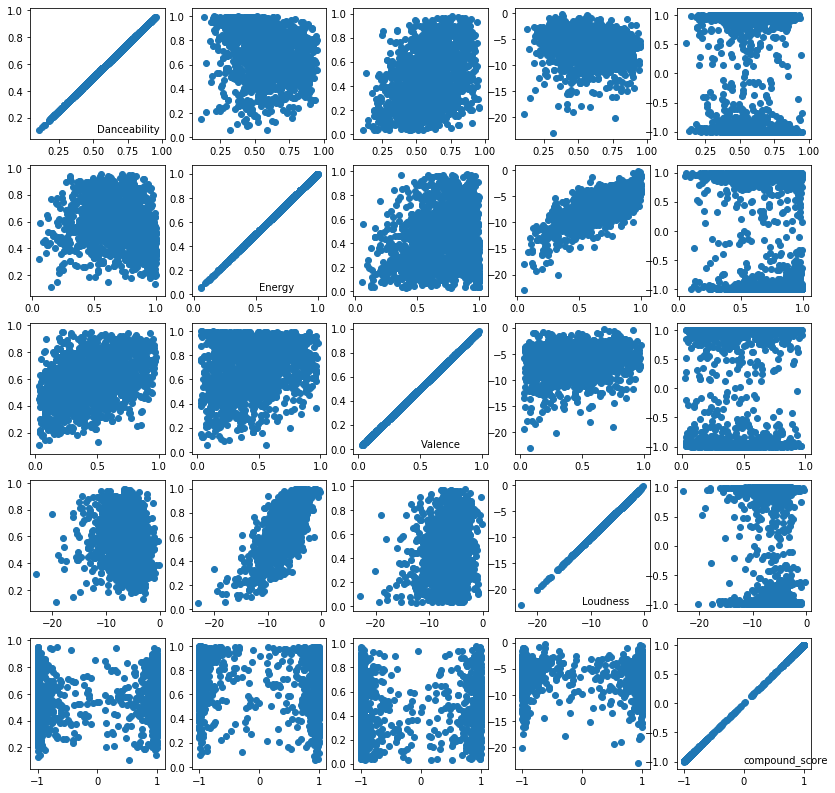

In [30]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness', 'compound_score']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

Looks like sentimental analysis does not correlate with any of these features<br>
<br>
Now we will compare number of pageviews, artist popularity, number of followers, duration of the song and amount of words in the song

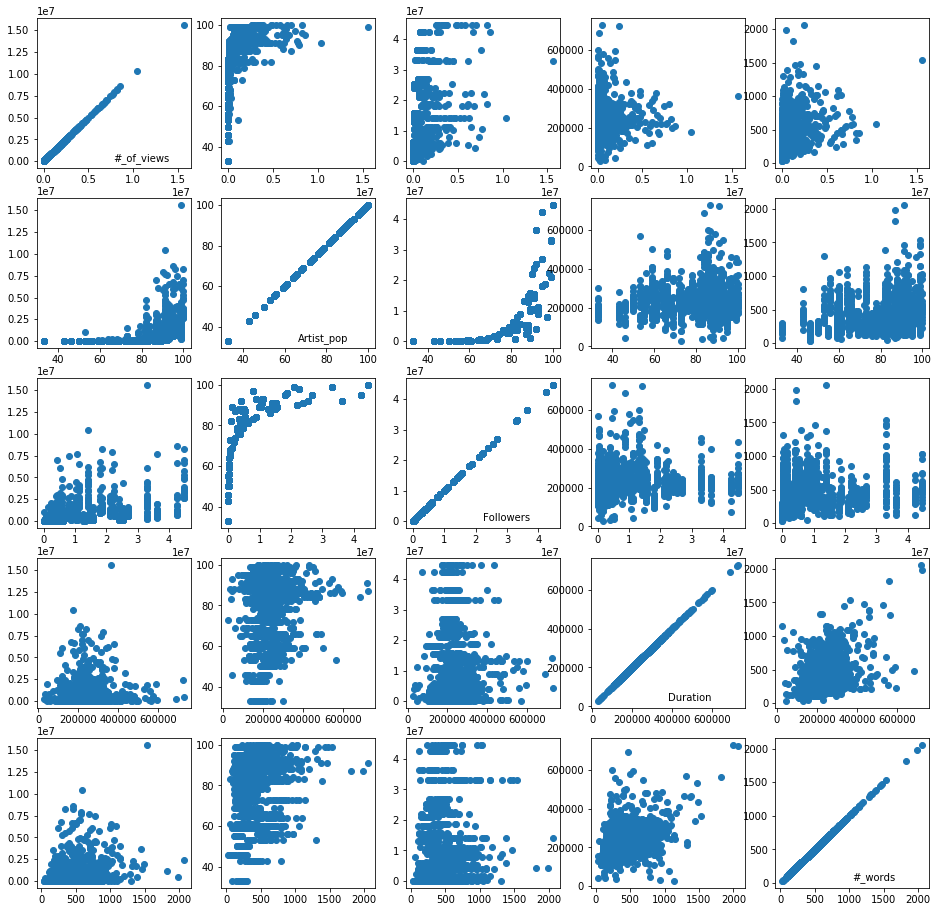

In [31]:
plt.figure(figsize = (16, 16))
data_names = ['#_of_views', 'Artist_pop', 'Followers', 'Duration', '#_words']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

Number of words and song's duration has some correlation, but it's quite obvious.<br>
The more interesting correlation is between Artist popularity and (Number of pageviews, Followers).<br>
As we can see as soon the popularyty of the artist gets close to 80 amount of page vizits and followers incrreases rapidly. And we can se that Followers and Pageviews are independent from each other. We can  assume that 80 popularity is a sort of starting point of the wide public interest.<br>
<br>
Now we mix some 'interesting' features together

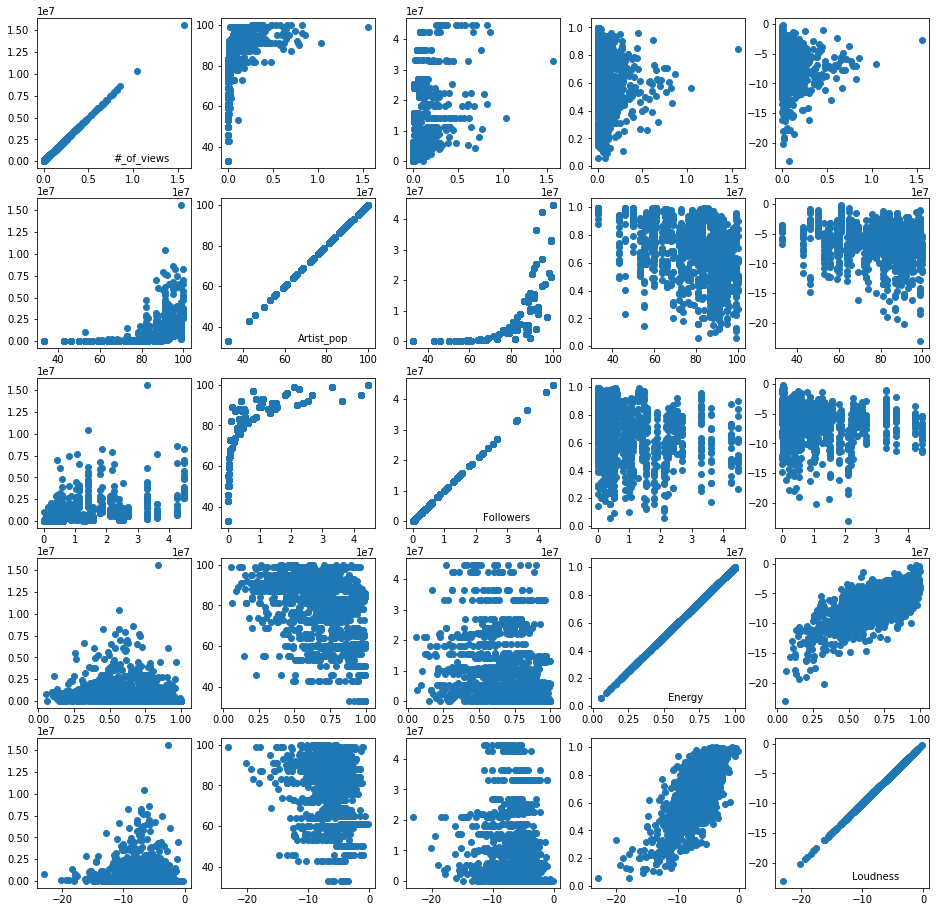

In [32]:
plt.figure(figsize = (16, 16))
data_names = ['#_of_views', 'Artist_pop', 'Followers', 'Energy', 'Loudness']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

We can see there is some dependency between pageviews and ('energy', 'loudness').<br>
Higher pageview rating with songs where energy and loudnes a little bit above average
<br><br>
Let's try to look at histograms

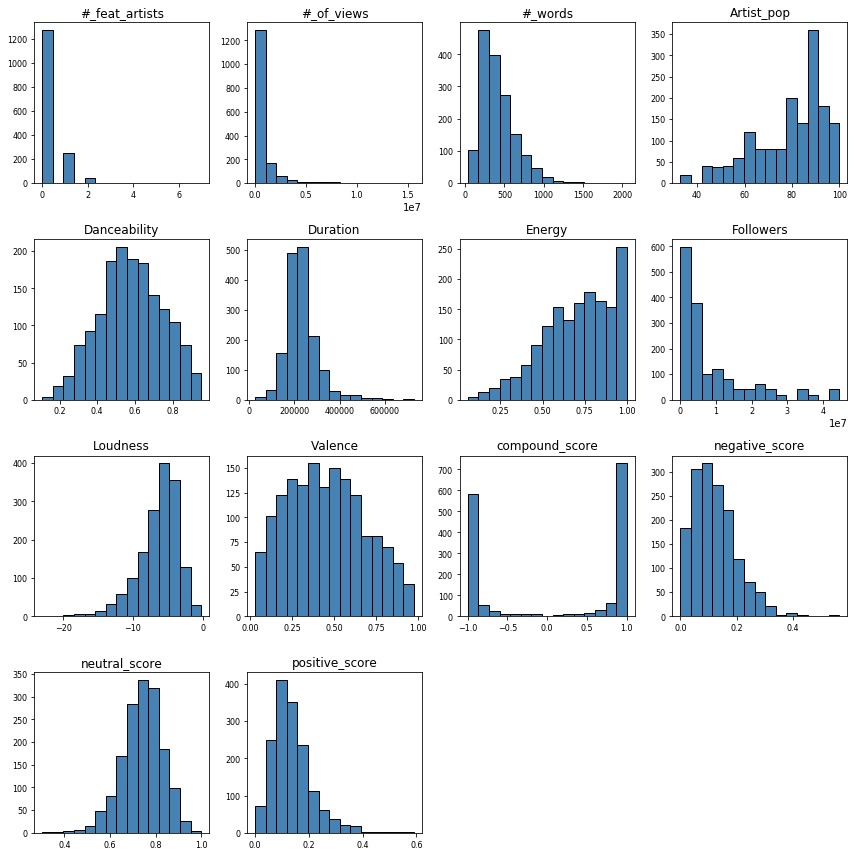

In [33]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize = (10,10))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

We can observe:
1. Amount of words mostly less then 500, common 200 - 400.
2. Duration correlates  with point #1 (as we saw before).
3. Most common Danceability and Vallence around the middle.
4. Energy and Loudness are skewed to the left.

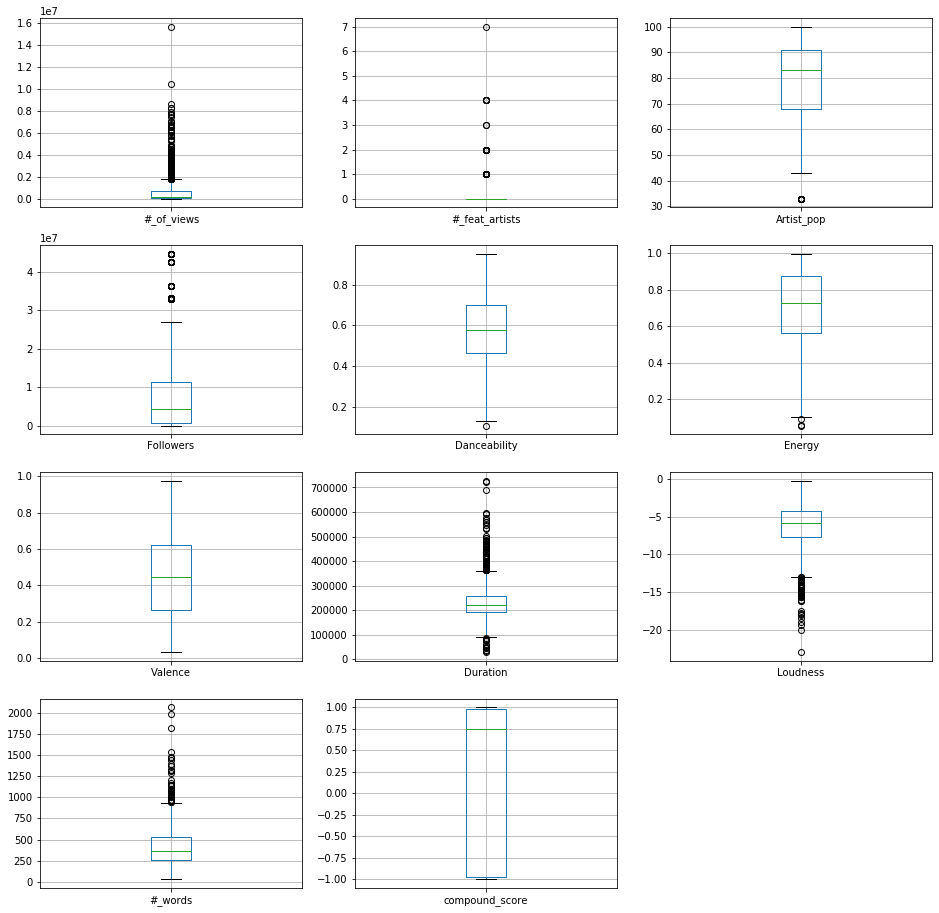

In [34]:
plt.figure(figsize = (16, 16))

columns = ['#_of_views', '#_feat_artists', 'Artist_pop', 'Followers', 'Danceability', 'Energy', 'Valence', 'Duration',
           'Loudness', '#_words', 'compound_score']

for i in range(len(columns)):
    plt.subplot(4, 3, i + 1)
    data.boxplot(column = columns[i])

<br>
As a final analisys we will take a look at the Heatmap

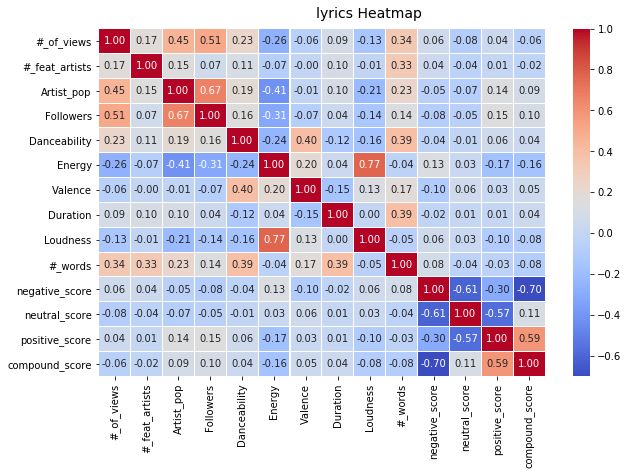

In [36]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('lyrics Heatmap', fontsize=14)

As we can see the results are correlate with dependencies we found before.